In [14]:
import pandas as pd
import numpy as np
import glob as glob
import librosa as lib
from matplotlib import pyplot as plt
import librosa.display
from PIL import Image

In [6]:

csv_path = '/mnt/bdata/Data/bilal_data/esc50/ESC-50/meta/esc50.csv'
audio_path = '/mnt/bdata/Data/bilal_data/esc50/ESC-50/audio'

df = pd.read_csv(csv_path)
files = glob.glob(audio_path+'/*')

In [7]:
df = df.rename(columns={'foldone':'fold1'})
df = df.rename(columns={'foldtwo':'fold2'})
df.tail()

,filename,fold,target,category,esc10,src_file,take
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A
1999,5-9032-A-0.wav,5,0,dog,True,9032,A


In [8]:
# get test_fold
fold_one = [df['fold'] == 1]
df['fold1'] = np.where(df['fold']== 1, True, False)
df['fold2'] = np.where(df['fold']== 2, True, False)
df['fold3'] = np.where(df['fold']== 3, True, False)
df['fold4'] = np.where(df['fold']== 4, True, False)
df['fold5'] = np.where(df['fold']== 5, True, False)
df.head()


,filename,fold,target,category,esc10,src_file,take,fold1,fold2,fold3,fold4,fold5
0,1-100032-A-0.wav,1,0,dog,True,100032,A,True,False,False,False,False
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A,True,False,False,False,False
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A,True,False,False,False,False
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B,True,False,False,False,False
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A,True,False,False,False,False


In [9]:
# fold1
val1 = []
train1 = []
for audio in files:
    name = audio.split('/')[-1]
    if name[0] =='1':
        val1.append(audio)
    else:
        train1.append(audio)

len(train1),len(val1)

(1600, 400)

In [10]:
audio, sfreq = lib.load(train1[1])
time = np.arange(0,len(audio)) / sfreq

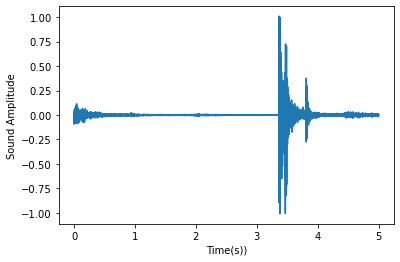

In [11]:
fig, ax = plt.subplots()
ax.plot(time,audio)
ax.set(xlabel='Time(s))',ylabel='Sound Amplitude')
plt.show()

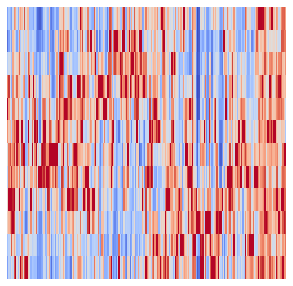

In [18]:
hop_length = 512
chromagram = lib.feature.chroma_stft(audio, sr=sfreq, hop_length=hop_length)
plt.figure(figsize=(5, 5))
plt.axis('off')
lib.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.savefig('chrome.png')

In [22]:
im = Image.open("chrome.png")
im.format, im.size, im.mode


('PNG', (360, 360), 'RGBA')